In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

file = pd.read_csv('BlackFriday.csv')




In [152]:
#printing dataset
#print(file)
file.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [153]:
file.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [2]:
file.isnull().any().sum()
file.shape
total_miss = file.isnull().sum()
perc_miss = total_miss/file.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending=False).head(3)

,Total missing,% missing
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713
User_ID,0,0.000000


/Users/akshaygupta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


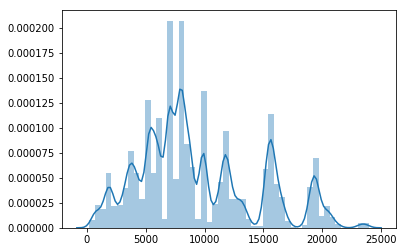

In [155]:
# distribution of Amount
import seaborn as sns
amount = [file['Purchase'].values]
sns.distplot(amount)

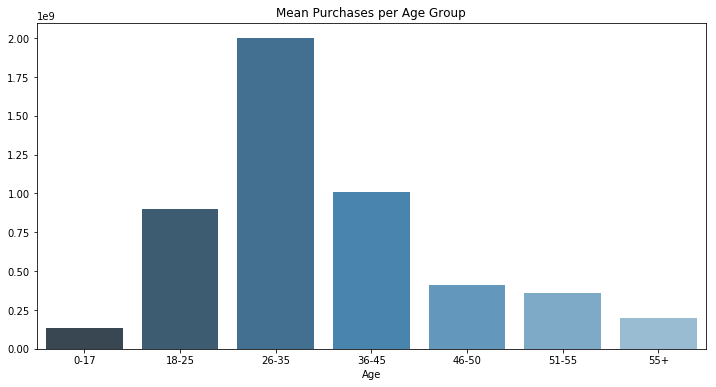

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
spent_byage = file.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues_d")
plt.title('Mean Purchases per Age Group')
plt.show()

In [3]:
for column in file.columns:
    print(column)
    print(len(file[column][file[column].isna()]))

User_ID
0
Product_ID
0
Gender
0
Age
0
Occupation
0
City_Category
0
Stay_In_Current_City_Years
0
Marital_Status
0
Product_Category_1
0
Product_Category_2
166986
Product_Category_3
373299
Purchase
0


In [4]:
data = file.fillna(0)

In [5]:
for column in data.columns:
    print(column)
    print(len(data[column][data[column].isna()]))

User_ID
0
Product_ID
0
Gender
0
Age
0
Occupation
0
City_Category
0
Stay_In_Current_City_Years
0
Marital_Status
0
Product_Category_1
0
Product_Category_2
0
Product_Category_3
0
Purchase
0


In [6]:
Y = data['Purchase']

In [7]:
X = data.drop(columns=['Purchase','User_ID', 'Product_ID'])#,'Age', 'User_ID', 'Product_ID','Gender','City_Category', 'Occupation', 'Product_Category_1','Product_Category_2','Product_Category_3'])
X_original = X



In [8]:
len(pd.unique(data['User_ID'])), len(pd.unique(data['Product_ID']))

(5891, 3623)

In [9]:
def run_model(model, X_train, Y_train, X_test = None, Y_test = None):
    print("Model: ", model.__class__.__name__)
    model.fit(X_train, Y_train)
    #model.coef_
    #a= model.predict(X_test)
    print("Training accuracy", model.score(X_train, Y_train)) 
    #print(a)
    
    if X_test is not None and Y_test is not None:
        print("Testing accuracy", model.score(X_test, Y_test))
        
        


In [162]:
        coef5=pd.Series(model.feature_importances_, X_original.columns).sort_values(ascending=False)
        coef5.plot(kind='bar',title='Feature Importances')
            params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

IndentationError: unexpected indent (<ipython-input-162-a60d9baf948f>, line 3)

In [10]:
def preprocess(X,Y,split=True):
    if 'Age' in X.columns:
        X['Min_Age'], X['Max_Age'] = X['Age'].str.split('-', 1).str
        X['Max_Age'].fillna('100', inplace=True)
        X['Min_Age'] = X['Min_Age'].str.replace('+', '')
        X['Min_Age'] = pd.to_numeric(X['Min_Age'])
        X['Max_Age'] = pd.to_numeric(X['Max_Age'])
        X = X.drop(columns=['Age'])
    

    if 'Stay_In_Current_City_Years' in X.columns:
        X['Stay_In_Current_City_Years'] = X['Stay_In_Current_City_Years'].str.replace('+', '')
        X['Stay_In_Current_City_Years'] = pd.to_numeric(X['Stay_In_Current_City_Years'])

    for column in ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
        if column in X.columns:
            X[column] = pd.to_numeric(X[column])
    
    X.index.name = 'key'
    
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    le = LabelEncoder()
    if 'Gender' in X.columns:
        X.Gender = le.fit_transform(X.Gender)
    if 'City_Category' in X.columns:    
        X.City_Category = le.fit_transform(X.City_Category)
        
    for column in ['Gender', 'City_Category', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
        if column in X.columns:
            # Get one hot encoding of columns B
            #print(column)
            one_hot = pd.get_dummies(X[column])
            one_hot.index.name='key'#, inplace=True)
            # Drop column B as it is now encoded
            X = X.drop(column, axis = 1)
            # Join the encoded df
            X = X.join(one_hot, on='key', how='left', lsuffix='_left', rsuffix='_right')
            #print("done")
            
    from sklearn.model_selection import train_test_split
    if split:
        return train_test_split(X, Y, test_size=.20, random_state=42)
    else:
        return X,Y


In [18]:

for column in X_original.columns:
    
    print("Trying with column", column)
    
    singleX = X_original[column]
    X = pd.DataFrame(singleX)
    
    X_train, X_test, y_train, y_test = preprocess(X,Y)
    
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.linear_model import Ridge
    
    
    params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    
    for model in [LinearRegression(normalize=True), DecisionTreeRegressor(), GradientBoostingRegressor(**params), Ridge(alpha=0.05,normalize=True)]:
        run_model(model, X_train, y_train, X_test, y_test)
        
        mse = mean_squared_error(y_test, model.predict(X_test))
        rmse = np.sqrt(mse)
        predicted_label = model.predict(X_test)
        
        print("predicted labels =",predicted_label)
        print("RootMeanSquareError =",rmse)

Trying with column Gender
Model:  LinearRegression
Training accuracy 0.0036261712167469096
Testing accuracy 0.003534825436058764
predicted labels = [9501.53401613 9501.53401613 9501.53401613 ... 9501.53401613 9501.53401613
 8804.76092679]
RootMeanSquareError = 4974.519972916245
Model:  DecisionTreeRegressor
Training accuracy 0.0036261712167469096
Testing accuracy 0.003534825436058764
predicted labels = [9501.53401613 9501.53401613 9501.53401613 ... 9501.53401613 9501.53401613
 8804.76092679]
RootMeanSquareError = 4974.519972916245
Model:  GradientBoostingRegressor
Training accuracy 0.0036260146704122365
Testing accuracy 0.0035352732403699516
predicted labels = [9500.40974289 9500.40974289 9500.40974289 ... 9500.40974289 9500.40974289
 8808.21478931]
RootMeanSquareError = 4974.518855159299
Model:  Ridge
Training accuracy 0.0036240140655173776
Testing accuracy 0.0035349062150190624
predicted labels = [9497.36060934 9497.36060934 9497.36060934 ... 9497.36060934 9497.36060934
 8817.5819855

Model:  LinearRegression
Training accuracy 0.11333777462430472
Testing accuracy 0.11222048823057962
predicted labels = [12344.26147461  8307.57336426  8307.57336426 ...  8307.57336426
  8307.57336426  8307.57336426]
RootMeanSquareError = 4695.40086258099
Model:  DecisionTreeRegressor
Training accuracy 0.11333777464310224
Testing accuracy 0.11222047617361021
predicted labels = [12344.26921159  8307.58248573  8307.58248573 ...  8307.58248573
  8307.58248573  8307.58248573]
RootMeanSquareError = 4695.400894465204
Model:  GradientBoostingRegressor
Training accuracy 0.11297667979219915
Testing accuracy 0.1121191805924725
predicted labels = [12236.43081148  8316.73145985  8316.73145985 ...  8316.73145985
  8316.73145985  8316.73145985]
RootMeanSquareError = 4695.668759280252
Model:  Ridge
Training accuracy 0.11322393978869662
Testing accuracy 0.11217210733500103
predicted labels = [12248.39818647  8336.44199258  8336.44199258 ...  8336.44199258
  8336.44199258  8336.44199258]
RootMeanSquareE

In [20]:

for column in X_original.columns:
    
    print("Trying without column", column)
    
    X = X_original.drop(columns=[column])
    
    
    
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    
    for model in [LinearRegression(normalize=True), DecisionTreeRegressor(), GradientBoostingRegressor(**params),Ridge(alpha=0.05,normalize=True)]:
        run_model(model, X_train, y_train, X_test, y_test)
        
        mse = mean_squared_error(y_test, model.predict(X_test))
        rmse = np.sqrt(mse)
        predicted_label = model.predict(X_test)
        
        print("predicted labels =",predicted_label)
        print("RootMeanSquareError =",rmse)
        print()
        


Trying without column Gender
Model:  LinearRegression
Training accuracy 0.11333777462430472
Testing accuracy 0.11222048823057962
predicted labels = [12344.26147461  8307.57336426  8307.57336426 ...  8307.57336426
  8307.57336426  8307.57336426]
RootMeanSquareError = 4695.40086258099

Model:  DecisionTreeRegressor
Training accuracy 0.11333777464310224
Testing accuracy 0.11222047617361021
predicted labels = [12344.26921159  8307.58248573  8307.58248573 ...  8307.58248573
  8307.58248573  8307.58248573]
RootMeanSquareError = 4695.400894465204

Model:  GradientBoostingRegressor
Training accuracy 0.11297667979219926
Testing accuracy 0.1121191805924725
predicted labels = [12236.43081148  8316.73145985  8316.73145985 ...  8316.73145985
  8316.73145985  8316.73145985]
RootMeanSquareError = 4695.668759280252

Model:  Ridge
Training accuracy 0.11322393978869662
Testing accuracy 0.11217210733500103
predicted labels = [12248.39818647  8336.44199258  8336.44199258 ...  8336.44199258
  8336.44199258

Training accuracy 0.11322393978869662
Testing accuracy 0.11217210733500103
predicted labels = [12248.39818647  8336.44199258  8336.44199258 ...  8336.44199258
  8336.44199258  8336.44199258]
RootMeanSquareError = 4695.528802345843

Trying without column Product_Category_3
Model:  LinearRegression
Training accuracy 0.11333777462430472
Testing accuracy 0.11222048823057962
predicted labels = [12344.26147461  8307.57336426  8307.57336426 ...  8307.57336426
  8307.57336426  8307.57336426]
RootMeanSquareError = 4695.40086258099

Model:  DecisionTreeRegressor
Training accuracy 0.11333777464310224
Testing accuracy 0.11222047617361021
predicted labels = [12344.26921159  8307.58248573  8307.58248573 ...  8307.58248573
  8307.58248573  8307.58248573]
RootMeanSquareError = 4695.400894465204

Model:  GradientBoostingRegressor
Training accuracy 0.11297667979219915
Testing accuracy 0.1121191805924725
predicted labels = [12236.43081148  8316.73145985  8316.73145985 ...  8316.73145985
  8316.73145985  

In [12]:
for column in X_original.columns:
    
    print("Trying with column", column)
    
    singleX = X_original[column]
    X = pd.DataFrame(singleX)
    
    X_train, X_test, y_train, y_test =preprocess(X,Y)
    
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    


    for model in [ GradientBoostingRegressor()]:
        run_model(model, X_train, y_train, X_test, y_test)
        print()

Trying with column Gender
Model:  GradientBoostingRegressor
Training accuracy 0.003626171214188511
Testing accuracy 0.0035348278787984415

Trying with column Age
Model:  GradientBoostingRegressor
Training accuracy 0.000448634791930691
Testing accuracy 0.0006040769412354319

Trying with column Occupation
Model:  GradientBoostingRegressor
Training accuracy 0.0037086488037041394
Testing accuracy 0.004065040648222773

Trying with column City_Category
Model:  GradientBoostingRegressor
Training accuracy 0.004972359234881485
Testing accuracy 0.005571479811015467

Trying with column Stay_In_Current_City_Years
Model:  GradientBoostingRegressor
Training accuracy 7.580982975408102e-05
Testing accuracy 6.512750207887663e-05

Trying with column Marital_Status
Model:  GradientBoostingRegressor
Training accuracy 8.671908827695417e-07
Testing accuracy -2.0869643509779934e-05

Trying with column Product_Category_1
Model:  GradientBoostingRegressor
Training accuracy 0.6245564529220851
Testing accuracy 0

In [167]:
X,y = preprocess(X_original,Y,False)
from sklearn.linear_model import Ridge

alg2=Ridge(alpha=0.05,normalize=True)

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

s_avg = 0
k_fold = KFold(n_splits=10, shuffle=False, random_state=43)
for train_index, test_index in k_fold.split(X,y):
    print(len(X_train), len(X_test))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    alg2.fit(X_train,y_train)
    original_values=y_test
    predicted=alg2.predict(X_test)
    s = alg2.score(X_test, y_test)
    print(s)
    s_avg = s_avg + s
s_avg = s_avg/10
print(s_avg)

Gender
done
City_Category
done
Occupation
done
Product_Category_1
done
Product_Category_2
done
Product_Category_3
done
430061 107516
0.6354787111533833
483819 53758
0.635897069668095
483819 53758
0.6396944405714107
483819 53758
0.6365226014455296
483819 53758
0.6388050054250529
483819 53758
0.6382468632627827
483819 53758
0.6383903600955667
483819 53758
0.6406875196920356
483820 53757
0.6362309001450372
483820 53757
0.6336499593212961
0.637360343078019


In [146]:
X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
key,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
model_DTR = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = preprocess(X_original, Y)
model_DTR.fit(X_train, y_train)

mse = mean_squared_error(y_test, model_DTR.predict(X_test))
rmse = np.sqrt(mse)
predicted_label = model_DTR.predict(X_test)
        
print("predicted labels =",predicted_label)
print("RootMeanSquareError =",rmse)
model_DTR.score(X_train, y_train), model_DTR.score(X_test, y_test)

predicted labels = [12882.51351351 15886.33333333  6767.40909091 ...  6396.48484848
 16552.38461538  8831.        ]
RootMeanSquareError = 3332.547243042518


(0.7982761011654916, 0.5527890827739447)

In [25]:
model_GBR = GradientBoostingRegressor()
X_train, X_test, y_train, y_test= preprocess(X_original, Y)
model_GBR.fit(X_train, y_train)
mse = mean_squared_error(y_test, model_GBR.predict(X_test))
rmse = np.sqrt(mse)
predicted_label = model_GBR.predict(X_test)
        
print("predicted labels =",predicted_label)
print("RootMeanSquareError =",rmse)
model_GBR.score(X_train, y_train), model_GBR.score(X_test, y_test)
model_GBR.score(X_train, y_train), model_GBR.score(X_test, y_test)

predicted labels = [13788.28986614 13086.90492241  7560.28696903 ...  6446.89756038
 15303.12112508  6479.60577996]
RootMeanSquareError = 3021.3259440326865


(0.6346008434420272, 0.6324174152619813)